In [1]:
!ls

2010 Federal STEM Education Inventory Data Set.xls
Untitled.ipynb
task.txt


In [116]:
!cat task.txt

Create a public repo called ml_stem_analysis on github and share with us.
 
Data: https://data.world/education/2010-federal-stem-inventory/file/2010%20Federal%20STEM%20Education%20Inventory%20Data%20Set.xls
 
Stage 1:
1) Calculate % growth of funding between year 2008 & 2009.
2) If funding is positive, tag it as 1, if funding is negative tag it as 0. This is the target variable.
 
Stage 2:
1) Create graphs of univariate distribution of all non funding variables and share on a jupyter notebook. Just FYI - Funding FY2008, FY2009, FY2010 are the "funding variables"
2) Calculate mutual_info_score of target variable created in stage 1 & ALL non funding variables and share on a jupyter notebook.
 
Stage 3:
1) Divide data into train & test samples. (70-30 split)
2) Select features & build xgboost model. You will be judged on roc_auc_score on test sample.
3) Write testcases on all user defined functions using pytest framework. This is one of the most important steps of this interview.


## Preprocessing

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split
sns.set()
%matplotlib notebook

In [118]:
df = pd.read_excel('2010 Federal STEM Education Inventory Data Set.xls')

In [119]:
df.shape

(254, 255)

In [120]:
from IPython.display import display
with pd.option_context('display.max_rows', None, 'display.max_columns', 10):
    display(df.head(3))

,PROGRAM,Unnamed: 1,Unnamed: 2,Unnamed: 3,FUNDING,...,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254
Index Number,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,...,Y4) Portfolio Evaluation/Review Type,NaN,NaN,Y5) Expert Review Type,NaN
PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002,...,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN
PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006,...,NaN,NaN,NO,NaN,NaN


In [121]:
df.columns = df.iloc[0]
df.head(3)

Index Number,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,E) Agency or Mission-Related Workforce Needs?,...,nan,nan,Y3) Process or Implementation Evaluation Type,nan,nan,Y4) Portfolio Evaluation/Review Type,nan,nan,Y5) Expert Review Type,nan
Index Number,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,E) Agency or Mission-Related Workforce Needs?,...,NaN,NaN,Y3) Process or Implementation Evaluation Type,NaN,NaN,Y4) Portfolio Evaluation/Review Type,NaN,NaN,Y5) Expert Review Type,NaN
PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002,5.24,7.19,5.7,General STEM,NaN,...,NaN,NaN,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN
PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006,14,14,14,General STEM,NaN,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN


In [122]:
df = df.iloc[1:]

In [123]:
df.columns

Index([                              'Investment Name',
                                              'Agency',
                                           'Subagency',
                                'A) Brief Description',
                                 'B) Year Established',
                                  'C1) Funding FY2008',
                                  'C2) Funding FY2009',
                                  'C3) Funding FY2010',
                'D) Mission-specific or General STEM?',
       'E) Agency or Mission-Related Workforce Needs?',
       ...
                                                   nan,
                                                   nan,
       'Y3) Process or Implementation Evaluation Type',
                                                   nan,
                                                   nan,
                'Y4) Portfolio Evaluation/Review Type',
                                                   nan,
                                     

In [124]:
# Create a list for df columns as shown in excel (here, multiple spanning of columns will be shown as colname + 0/1/2....)
lis = []
k = 0
for x, y in zip(df.columns.isnull(), df.columns):
    if not x:
        z = y
        lis.append(y)
        j = 0
        k = 0
    else:
        if j == 0:
            lis.pop()
            lis.append(z + str(k))
            k += 1
            lis.append(str(z) + str(k))
        else:
            k += 1
            lis.append(str(z) + str(k))
lis[:15]

['Investment Name',
 'Agency',
 'Subagency',
 'A) Brief Description',
 'B) Year Established',
 'C1) Funding FY2008',
 'C2) Funding FY2009',
 'C3) Funding FY2010',
 'D) Mission-specific or General STEM?',
 'E) Agency or Mission-Related Workforce Needs?',
 'F1) Primary Investment Objective',
 'F2) Secondary Investment Objectives0',
 'F2) Secondary Investment Objectives1',
 'F2) Secondary Investment Objectives2',
 'F2) Secondary Investment Objectives3']

In [125]:
df.columns = lis

In [126]:
df.head(3)

,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,E) Agency or Mission-Related Workforce Needs?,...,Y2) Summative Evaluation Type1,Y2) Summative Evaluation Type2,Y3) Process or Implementation Evaluation Type0,Y3) Process or Implementation Evaluation Type1,Y3) Process or Implementation Evaluation Type2,Y4) Portfolio Evaluation/Review Type0,Y4) Portfolio Evaluation/Review Type1,Y4) Portfolio Evaluation/Review Type2,Y5) Expert Review Type0,Y5) Expert Review Type1
PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002,5.24,7.19,5.7,General STEM,NaN,...,NaN,NaN,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN
PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006,14,14,14,General STEM,NaN,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
PRG_0003,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,Through the CISE Pathways to Revitalized Under...,2007,5,5,4.37,General STEM,NaN,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN


## Stage 1


#### 1) Calculate % growth of funding between year 2008 & 2009.

In [127]:
df.columns[:10]

Index(['Investment Name', 'Agency', 'Subagency', 'A) Brief Description',
       'B) Year Established', 'C1) Funding FY2008', 'C2) Funding FY2009',
       'C3) Funding FY2010', 'D) Mission-specific or General STEM?',
       'E) Agency or Mission-Related Workforce Needs?'],
      dtype='object')

In [128]:
# Some of the df['C1) Funding FY2008'] are = NaN. Assuming that the funding for those years was 0

df['C1) Funding FY2008'].fillna(0, inplace=True)
df['C2) Funding FY2009'].fillna(0, inplace=True)
df['C3) Funding FY2010'].fillna(0, inplace=True)

In [129]:
def calculate_percent_increase(x):
    try:
        ans = (x['C3) Funding FY2010'] - x['C1) Funding FY2008']) / x['C1) Funding FY2008']
        return (ans * 100)
    except ZeroDivisionError:
        return (100)

In [130]:

df["% Increase"] = df.apply(lambda x: calculate_percent_increase(x), axis=1)
df

,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,E) Agency or Mission-Related Workforce Needs?,...,Y2) Summative Evaluation Type2,Y3) Process or Implementation Evaluation Type0,Y3) Process or Implementation Evaluation Type1,Y3) Process or Implementation Evaluation Type2,Y4) Portfolio Evaluation/Review Type0,Y4) Portfolio Evaluation/Review Type1,Y4) Portfolio Evaluation/Review Type2,Y5) Expert Review Type0,Y5) Expert Review Type1,% Increase
PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002,5.240000,7.190000,5.700000,General STEM,NaN,...,NaN,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,8.778626
PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006,14.000000,14.000000,14.000000,General STEM,NaN,...,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,0.000000
PRG_0003,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,Through the CISE Pathways to Revitalized Under...,2007,5.000000,5.000000,4.370000,General STEM,NaN,...,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,-12.600000
PRG_0004,Opportunities for Enhancing Diversity in the G...,National Science Foundation,Directorate for Geosciences (GEO),The Opportunities for Enhancing Diversity in t...,2002,4.570000,11.790000,4.180000,General STEM,NaN,...,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,-8.533917
PRG_0005,Geoscience Education,National Science Foundation,Directorate for Geosciences (GEO),The Geoscience Education (GeoEd) program is fo...,1999,1.630000,2.740000,2.020000,General STEM,NaN,...,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,23.926380
PRG_0006,Geoscience Teacher Training (GEO-Teach),National Science Foundation,Directorate for Geosciences (GEO),The Geoscience Teacher Training (GEO-Teach) pr...,2006,3.000000,3.000000,2.980000,General STEM,NaN,...,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,-0.666667
PRG_0007,Global Learning and Observations to Benefit th...,National Science Foundation,Directorate for Geosciences (GEO),The GLOBE Program is a hands-on international ...,1995,1.100000,1.120000,1.100000,General STEM,NaN,...,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,0.000000
PRG_0008,Graduate Research Fellowship Program (GRFP),National Science Foundation,Directorate for Education and Human Resources ...,The purpose of the NSF Graduate Research Fello...,1952,96.020000,162.430000,136.130000,General STEM,NaN,...,NO,NaN,NaN,NO,NaN,NaN,NO,INDEPENDENT,NaN,41.772547
PRG_0009,Integrative Graduate Education and Research Tr...,National Science Foundation,Directorate for Education and Human Resources ...,IGERT is an NSF-wide program intended to meet ...,1997,64.760000,77.990000,69.700000,General STEM,NaN,...,NO,NaN,NaN,NO,NaN,NaN,NO,INDEPENDENT,NaN,7.628166
PRG_0010,Graduate Teaching Fellows in K-12 Education (G...,National Science Foundation,Directorate for Education and Human Resources ...,The objectives of the GK-12 program are: 1) to...,1999,54.600000,58.840000,55.970000,General STEM,NaN,...,NO,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,2.509158


#### 2) If funding is positive, tag it as 1, if funding is negative tag it as 0. This is the target variable.

In [131]:
df['Target Variable'] = df['% Increase'].apply(lambda x: 1 if x >= 0 else 0)

In [132]:
df

,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,E) Agency or Mission-Related Workforce Needs?,...,Y3) Process or Implementation Evaluation Type0,Y3) Process or Implementation Evaluation Type1,Y3) Process or Implementation Evaluation Type2,Y4) Portfolio Evaluation/Review Type0,Y4) Portfolio Evaluation/Review Type1,Y4) Portfolio Evaluation/Review Type2,Y5) Expert Review Type0,Y5) Expert Review Type1,% Increase,Target Variable
PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002,5.240000,7.190000,5.700000,General STEM,NaN,...,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,8.778626,1
PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006,14.000000,14.000000,14.000000,General STEM,NaN,...,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,0.000000,1
PRG_0003,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,Through the CISE Pathways to Revitalized Under...,2007,5.000000,5.000000,4.370000,General STEM,NaN,...,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,-12.600000,0
PRG_0004,Opportunities for Enhancing Diversity in the G...,National Science Foundation,Directorate for Geosciences (GEO),The Opportunities for Enhancing Diversity in t...,2002,4.570000,11.790000,4.180000,General STEM,NaN,...,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,-8.533917,0
PRG_0005,Geoscience Education,National Science Foundation,Directorate for Geosciences (GEO),The Geoscience Education (GeoEd) program is fo...,1999,1.630000,2.740000,2.020000,General STEM,NaN,...,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,23.926380,1
PRG_0006,Geoscience Teacher Training (GEO-Teach),National Science Foundation,Directorate for Geosciences (GEO),The Geoscience Teacher Training (GEO-Teach) pr...,2006,3.000000,3.000000,2.980000,General STEM,NaN,...,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,-0.666667,0
PRG_0007,Global Learning and Observations to Benefit th...,National Science Foundation,Directorate for Geosciences (GEO),The GLOBE Program is a hands-on international ...,1995,1.100000,1.120000,1.100000,General STEM,NaN,...,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,0.000000,1
PRG_0008,Graduate Research Fellowship Program (GRFP),National Science Foundation,Directorate for Education and Human Resources ...,The purpose of the NSF Graduate Research Fello...,1952,96.020000,162.430000,136.130000,General STEM,NaN,...,NaN,NaN,NO,NaN,NaN,NO,INDEPENDENT,NaN,41.772547,1
PRG_0009,Integrative Graduate Education and Research Tr...,National Science Foundation,Directorate for Education and Human Resources ...,IGERT is an NSF-wide program intended to meet ...,1997,64.760000,77.990000,69.700000,General STEM,NaN,...,NaN,NaN,NO,NaN,NaN,NO,INDEPENDENT,NaN,7.628166,1
PRG_0010,Graduate Teaching Fellows in K-12 Education (G...,National Science Foundation,Directorate for Education and Human Resources ...,The objectives of the GK-12 program are: 1) to...,1999,54.600000,58.840000,55.970000,General STEM,NaN,...,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,2.509158,1


## Stage 2

#### 1) Create graphs of univariate distribution of all non funding variables and share on a jupyter notebook. Just FYI - Funding FY2008, FY2009, FY2010 are the "funding variables"

##### 2008

In [133]:
df['C1) Funding FY2008'].nlargest(10)

# Since most values lie between [0, 200], I will show the univariate distribution plot for the same range by default
# note that this means that the top 2 vals will be absent in the plot for the convenience of the graph.

NaN         2796.835667
PRG_0220     259.076349
PRG_0327     194.000000
PRG_0183     179.000000
PRG_0190     100.000000
PRG_0028      99.250000
PRG_0008      96.020000
PRG_0320      92.400000
PRG_0180      76.295000
PRG_0301      74.439000
Name: C1) Funding FY2008, dtype: float64

<IPython.core.display.Javascript object>


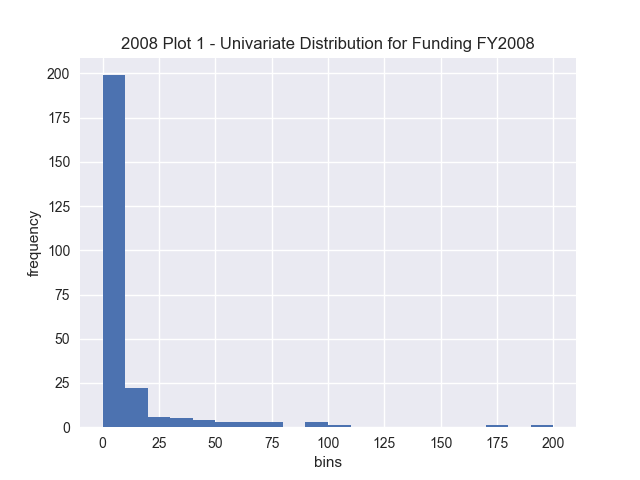

In [134]:
plt.figure()
plt.hist(df['C1) Funding FY2008'], bins=20, range=(0, 200))
plt.title("2008 Plot 1 - Univariate Distribution for Funding FY2008")
plt.xlabel('bins')
plt.ylabel('frequency')

<IPython.core.display.Javascript object>


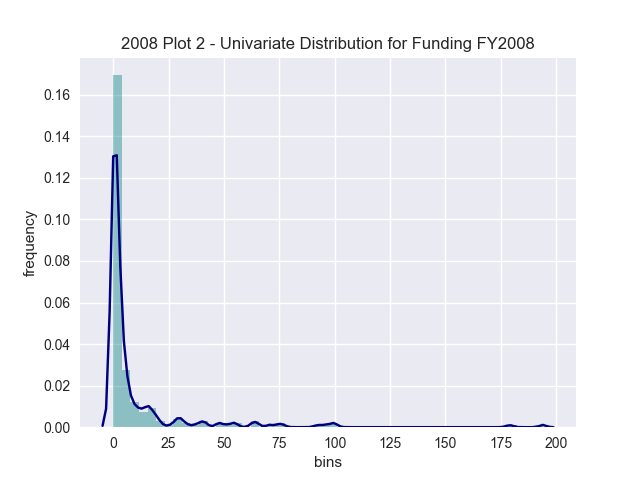

In [135]:
plt.figure()
sns.distplot(sorted(df['C1) Funding FY2008'])[:-2], hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});
plt.title("2008 Plot 2 - Univariate Distribution for Funding FY2008")
plt.xlabel('bins')
plt.ylabel('frequency')

##### 2009

In [140]:
df['C2) Funding FY2009'].nlargest(10)

# Since most values lie between [0, 200], I will show the univariate distribution plot for the same range by default
# note that this means that the top 2 vals will be absent in the plot for the convenience of the graph.

NaN         3354.390546
PRG_0327     341.000000
PRG_0220     266.467113
PRG_0183     179.000000
PRG_0008     162.430000
PRG_0021     115.000000
PRG_0028     108.410000
PRG_0020     100.470000
PRG_0190     100.000000
PRG_0019      85.990000
Name: C2) Funding FY2009, dtype: float64

In [141]:
# Seeing an NaN value for index, let us check out that tuple. Seems Spurious.
df[df['C2) Funding FY2009'] > 1000]

,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,E) Agency or Mission-Related Workforce Needs?,...,Y3) Process or Implementation Evaluation Type0,Y3) Process or Implementation Evaluation Type1,Y3) Process or Implementation Evaluation Type2,Y4) Portfolio Evaluation/Review Type0,Y4) Portfolio Evaluation/Review Type1,Y4) Portfolio Evaluation/Review Type2,Y5) Expert Review Type0,Y5) Expert Review Type1,% Increase,Target Variable
NaN,NaN,NaN,NaN,NaN,NaN,2796.835667,3354.390546,3425.286526,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.470067,1


In [143]:
# and it is! Let us remove it
df = df[df.index.notnull()]

In [144]:
df.shape

(252, 257)

In [145]:
df['C2) Funding FY2009'].nlargest(10)

# Since most values lie between [0, 300], I will show the univariate distribution plot for the same range by default
# note that this means that the top 2 vals will be absent in the plot for the convenience of the graph.

PRG_0327    341.000000
PRG_0220    266.467113
PRG_0183    179.000000
PRG_0008    162.430000
PRG_0021    115.000000
PRG_0028    108.410000
PRG_0020    100.470000
PRG_0190    100.000000
PRG_0019     85.990000
PRG_0301     83.452600
Name: C2) Funding FY2009, dtype: float64

<IPython.core.display.Javascript object>


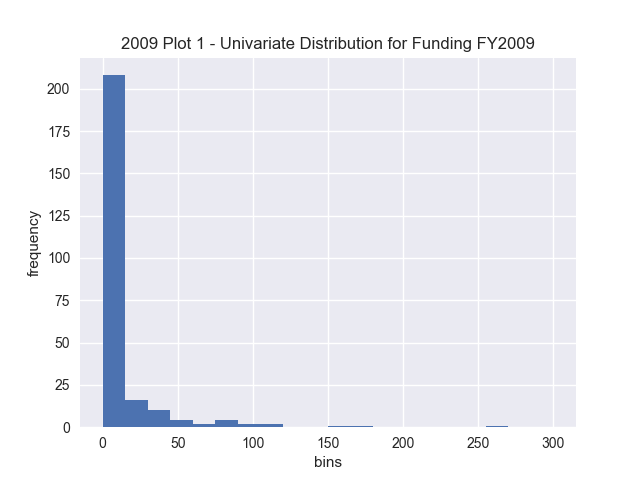

In [147]:
plt.figure()
plt.hist(df['C2) Funding FY2009'], bins=20, range=(0, 300))
plt.title("2009 Plot 1 - Univariate Distribution for Funding FY2009")
plt.xlabel('bins')
plt.ylabel('frequency')

<IPython.core.display.Javascript object>


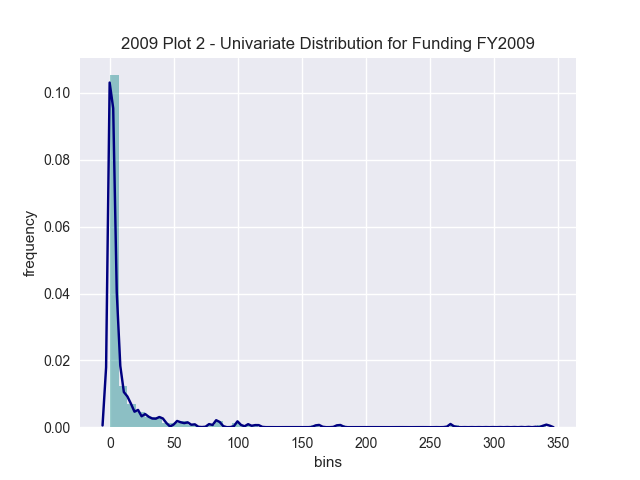

In [151]:
plt.figure()
sns.distplot(sorted(df['C2) Funding FY2009'])[:], hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});
plt.title("2009 Plot 2 - Univariate Distribution for Funding FY2009")
plt.xlabel('bins')
plt.ylabel('frequency')

##### 2010

In [152]:
df['C3) Funding FY2010'].nlargest(10)

# Since most values lie between [0, 300], I will show the univariate distribution plot for the same range by default
# note that this means that the top 2 vals will be absent in the plot for the convenience of the graph.

PRG_0327    379.776000
PRG_0220    230.840328
PRG_0183    180.500000
PRG_0008    136.130000
PRG_0028    118.380000
PRG_0184    110.500000
PRG_0190    100.000000
PRG_0301     83.670600
PRG_0020     80.990000
PRG_0320     75.960000
Name: C3) Funding FY2010, dtype: float64

<IPython.core.display.Javascript object>


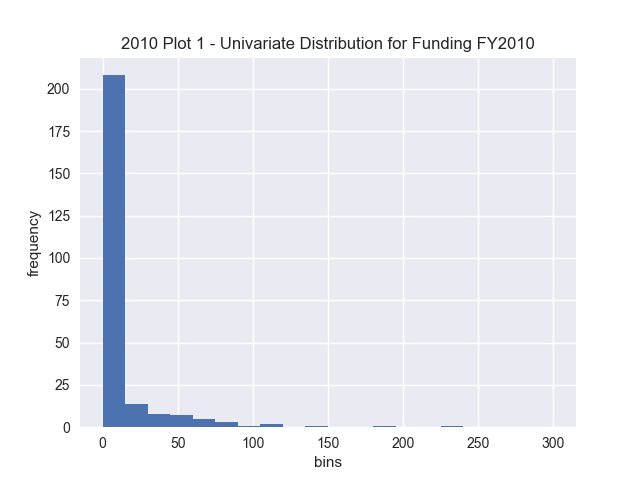

In [153]:
plt.figure()
plt.hist(df['C3) Funding FY2010'], bins=20, range=(0, 300))
plt.title("2010 Plot 1 - Univariate Distribution for Funding FY2010")
plt.xlabel('bins')
plt.ylabel('frequency')

<IPython.core.display.Javascript object>


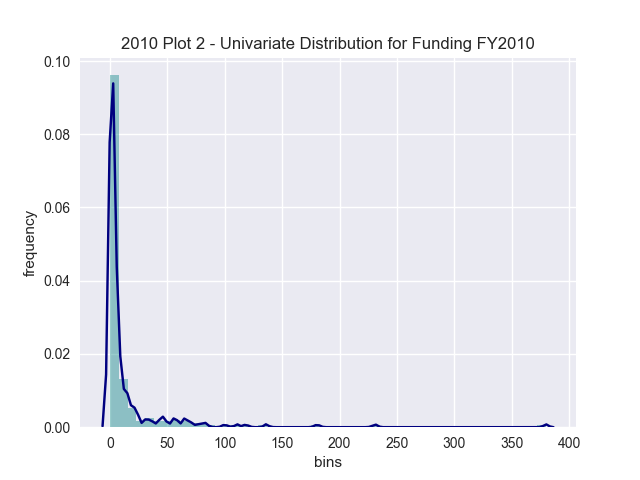

In [154]:
plt.figure()
sns.distplot(sorted(df['C3) Funding FY2010'])[:], hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});
plt.title("2010 Plot 2 - Univariate Distribution for Funding FY2010")
plt.xlabel('bins')
plt.ylabel('frequency')

##### 2) Calculate mutual_info_score of target variable created in stage 1 & ALL non funding variables and share on a jupyter notebook.

In [183]:
df.head(3)

,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,E) Agency or Mission-Related Workforce Needs?,...,Y3) Process or Implementation Evaluation Type0,Y3) Process or Implementation Evaluation Type1,Y3) Process or Implementation Evaluation Type2,Y4) Portfolio Evaluation/Review Type0,Y4) Portfolio Evaluation/Review Type1,Y4) Portfolio Evaluation/Review Type2,Y5) Expert Review Type0,Y5) Expert Review Type1,% Increase,Target Variable
PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002,5.24,7.19,5.70,General STEM,NaN,...,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,8.778626,1
PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006,14.00,14.00,14.00,General STEM,NaN,...,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,0.000000,1
PRG_0003,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,Through the CISE Pathways to Revitalized Under...,2007,5.00,5.00,4.37,General STEM,NaN,...,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,-12.600000,0


In [174]:
# Since there are many NaNs in the df, it won't work if I simply try to find the mutual info score.
# However, since I am dealing with string data in every column which contains NaN, so I can change all the NaNs to a 
# constant value, say "None" for instance. This will help in completing this task.

df2 = df.fillna(value='None')

# Also, converting all int values to str for compatibility

df2 = df2.astype(str)

In [175]:
df2.head(3)

,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,E) Agency or Mission-Related Workforce Needs?,...,Y3) Process or Implementation Evaluation Type0,Y3) Process or Implementation Evaluation Type1,Y3) Process or Implementation Evaluation Type2,Y4) Portfolio Evaluation/Review Type0,Y4) Portfolio Evaluation/Review Type1,Y4) Portfolio Evaluation/Review Type2,Y5) Expert Review Type0,Y5) Expert Review Type1,% Increase,Target Variable
PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002,5.24,7.19,5.7,General STEM,None,...,None,None,NO,INDEPENDENT,None,None,INDEPENDENT,None,8.7786259542,1
PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006,14.0,14.0,14.0,General STEM,None,...,None,None,NO,None,None,NO,None,None,0.0,1
PRG_0003,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,Through the CISE Pathways to Revitalized Under...,2007,5.0,5.0,4.37,General STEM,None,...,None,None,NO,None,None,NO,None,None,-12.6,0


In [181]:
# now, we can easily calculate mutual info score using a loop
mutual_info_score_with_target_variable = {}

banned_cols = ['C1) Funding FY2008','C2) Funding FY2009','C3) Funding FY2010']
for i, col in enumerate(df2.columns):
    if col in banned_cols:
        continue
    else:
        sys.stdout.write("\r")
        sys.stdout.write("Iteration %d of %d" % (i+1, len(df2.columns)))
        sys.stdout.flush()
        mutual_info_score_with_target_variable[col] = mutual_info_score(df2['Target Variable'], df2[col])


Iteration 257 of 257

In [182]:
mutual_info_score_with_target_variable

{'% Increase': 0.51957983913051564,
 'A) Brief Description': 0.51957983913051597,
 'Agency': 0.029044523797009253,
 'B) Year Established': 0.13140557322449184,
 'D) Mission-specific or General STEM?': 0.0033964769009973139,
 'E) Agency or Mission-Related Workforce Needs?': 0.0024713662294236112,
 'F1) Primary Investment Objective': 0.0038601511546910786,
 'F2) Secondary Investment Objectives0': 0.013161504068475438,
 'F2) Secondary Investment Objectives1': 0.010267973761118265,
 'F2) Secondary Investment Objectives2': 0.0027804475241016424,
 'F2) Secondary Investment Objectives3': 0.0011345135717301114,
 'F2) Secondary Investment Objectives4': 0.011871156145468464,
 'F2) Secondary Investment Objectives5': 0.0031460285946380839,
 'F2) Secondary Investment Objectives6': 0.00016887961962547271,
 'F2) Secondary Investment Objectives7': 0.000693316975483943,
 'F2) Secondary Investment Objectives8': 0.003064507138568498,
 'F2) Secondary Investment Objectives9': 0.060627558262417475,
 'G1) Pr

## Stage 3

##### 1) Divide data into train & test samples. (70-30 split)

In [206]:
X = df[df.columns[:-1]]
y = df['Target Variable']

In [207]:
X_train, X_test, y_train, y_test = train_test_split(df[:-1], y, test_size=0.3, random_state=23)

ValueError: Found input variables with inconsistent numbers of samples: [251, 252]

In [208]:
len(X), len(y)

(252, 252)

,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,E) Agency or Mission-Related Workforce Needs?,...,Y2) Summative Evaluation Type2,Y3) Process or Implementation Evaluation Type0,Y3) Process or Implementation Evaluation Type1,Y3) Process or Implementation Evaluation Type2,Y4) Portfolio Evaluation/Review Type0,Y4) Portfolio Evaluation/Review Type1,Y4) Portfolio Evaluation/Review Type2,Y5) Expert Review Type0,Y5) Expert Review Type1,% Increase
PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002,5.240000,7.190000,5.700000,General STEM,NaN,...,NaN,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,8.778626
PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006,14.000000,14.000000,14.000000,General STEM,NaN,...,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,0.000000
PRG_0003,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,Through the CISE Pathways to Revitalized Under...,2007,5.000000,5.000000,4.370000,General STEM,NaN,...,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,-12.600000
PRG_0004,Opportunities for Enhancing Diversity in the G...,National Science Foundation,Directorate for Geosciences (GEO),The Opportunities for Enhancing Diversity in t...,2002,4.570000,11.790000,4.180000,General STEM,NaN,...,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,-8.533917
PRG_0005,Geoscience Education,National Science Foundation,Directorate for Geosciences (GEO),The Geoscience Education (GeoEd) program is fo...,1999,1.630000,2.740000,2.020000,General STEM,NaN,...,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,23.926380
PRG_0006,Geoscience Teacher Training (GEO-Teach),National Science Foundation,Directorate for Geosciences (GEO),The Geoscience Teacher Training (GEO-Teach) pr...,2006,3.000000,3.000000,2.980000,General STEM,NaN,...,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,-0.666667
PRG_0007,Global Learning and Observations to Benefit th...,National Science Foundation,Directorate for Geosciences (GEO),The GLOBE Program is a hands-on international ...,1995,1.100000,1.120000,1.100000,General STEM,NaN,...,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,0.000000
PRG_0008,Graduate Research Fellowship Program (GRFP),National Science Foundation,Directorate for Education and Human Resources ...,The purpose of the NSF Graduate Research Fello...,1952,96.020000,162.430000,136.130000,General STEM,NaN,...,NO,NaN,NaN,NO,NaN,NaN,NO,INDEPENDENT,NaN,41.772547
PRG_0009,Integrative Graduate Education and Research Tr...,National Science Foundation,Directorate for Education and Human Resources ...,IGERT is an NSF-wide program intended to meet ...,1997,64.760000,77.990000,69.700000,General STEM,NaN,...,NO,NaN,NaN,NO,NaN,NaN,NO,INDEPENDENT,NaN,7.628166
PRG_0010,Graduate Teaching Fellows in K-12 Education (G...,National Science Foundation,Directorate for Education and Human Resources ...,The objectives of the GK-12 program are: 1) to...,1999,54.600000,58.840000,55.970000,General STEM,NaN,...,NO,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,2.509158
